In [2]:
import os
import cv2
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import keras
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score 

# Define Data Path


In [3]:
train_path = r'./Data/train'
test_path = r'./Data/test'
val_path = r'./Data/val'

# Define Categories

In [4]:
CATEGORIES = ['ArtDecor', 'Hitech', 'Indochina', 'Industrial', 'Scandinavian']

# Define Image Input Size

In [5]:
IMG_SIZE = 299

# Load Data From Directory

In [6]:
batch_size_train = 100
batch_size_val = 100

In [7]:
training_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='categorical',
    batch_size=batch_size_train
)

validation_generator = validation_datagen.flow_from_directory(
    val_path,
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='categorical',
    batch_size=batch_size_val
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='categorical',
    batch_size=batch_size_val
)

Found 11432 images belonging to 5 classes.
Found 2023 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.


# InceptionV3 Model

In [8]:
inception = InceptionV3(input_shape = (299, 299, 3), weights = 'imagenet', include_top = False)

In [9]:
for layer in inception.layers:
    layer.trainable = False

x = Flatten()(inception.output)
prediction = Dense(5, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

history = model.fit(train_generator, validation_data = validation_generator, epochs = 20, steps_per_epoch = 20, shuffle=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

# Load Model From h5 File

In [10]:
# model = tf.keras.models.load_model('inception_v3_model.h5')

# Visualization

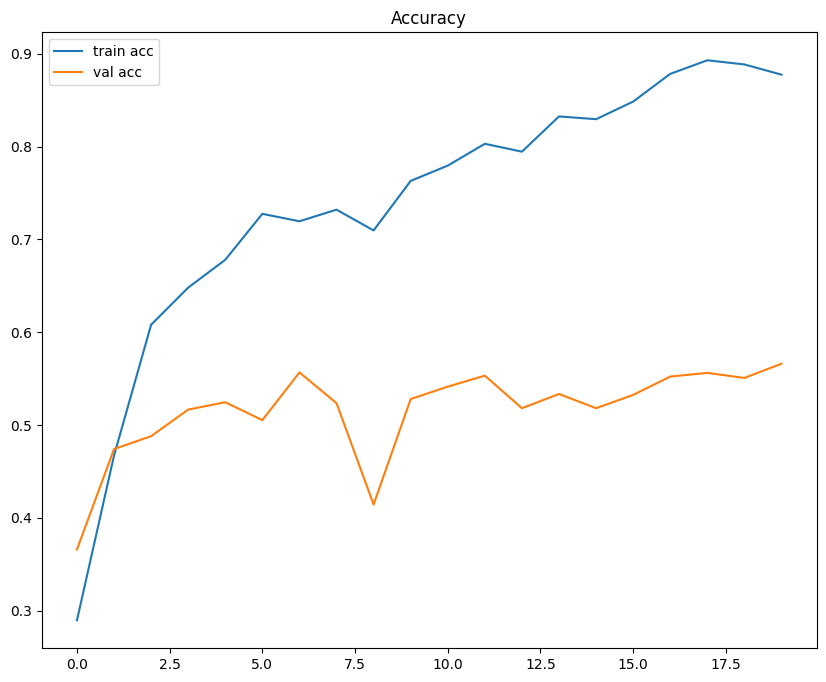

In [11]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

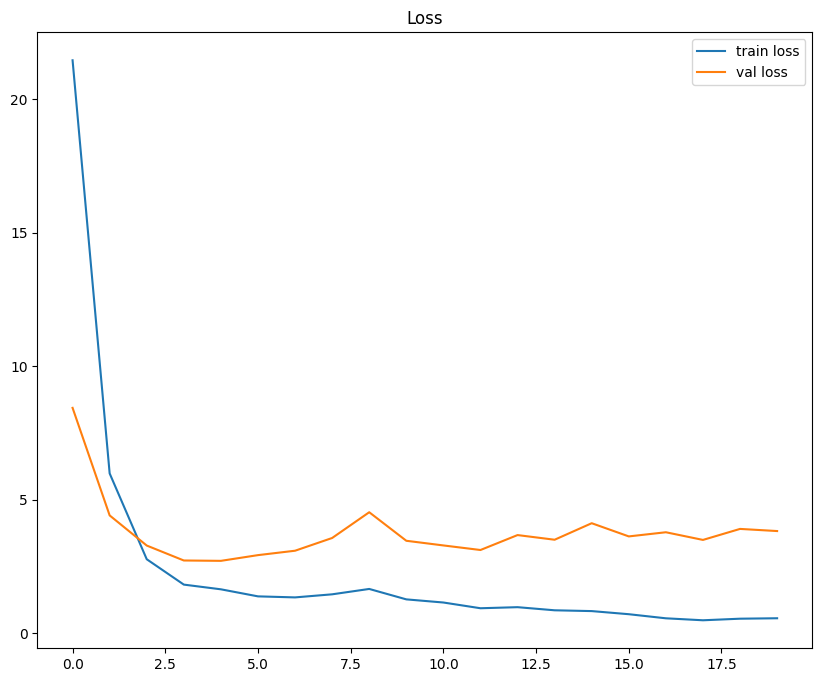

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

# Confusion Matrix

In [13]:
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred,axis=1)

21/21 [==============================] - 6s 239ms/step


In [14]:
validation_generator.labels

array([0, 0, 0, ..., 4, 4, 4])

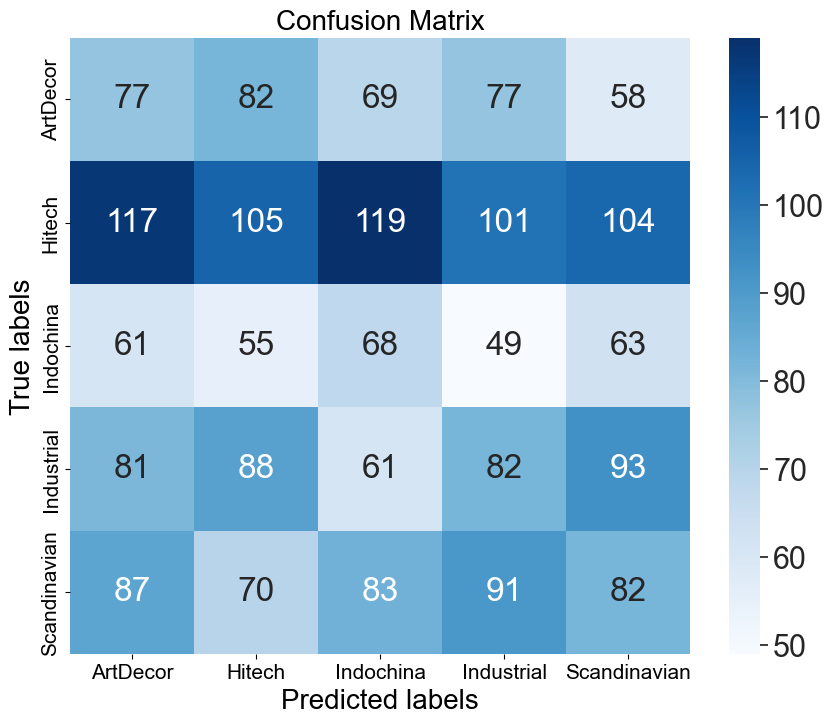

In [15]:
cm = confusion_matrix(y_pred,validation_generator.labels)

plt.figure(figsize=(10, 8))
ax = plt.subplot()
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20);ax.set_ylabel('True labels', fontsize=20); 
ax.set_title('Confusion Matrix', fontsize=20); 
ax.xaxis.set_ticklabels(['ArtDecor', 'Hitech', 'Indochina', 'Industrial', 'Scandinavian'], fontsize=15); ax.yaxis.set_ticklabels(['ArtDecor', 'Hitech', 'Indochina', 'Industrial', 'Scandinavian'], fontsize=15);

# Alternative Confusion Matrix

In [16]:
DATADIR = "./Data/test"
CATEGORIES = ["ArtDecor", "Hitech", "Indochina", "Industrial", "Scandinavian"]

predict_data = []
IMG_SIZE = 299

def create_predict_data():
    for category in CATEGORIES:  
        temp_predict_data = []
        path = os.path.join(DATADIR,category)  # create path 
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                temp_predict_data.append(new_array)
#                 predict_data.append([new_array, class_num])
            except Exception as e:  # in the interest in keeping the output clean...
                pass
#             except OSError as e:
#                print("OSErrroBad img most likely", e, os.path.join(path,img))
#             except Exception as e:
#                print("general exception", e, os.path.join(path,img))
        predict_data.append(temp_predict_data)

create_predict_data()

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 768.25it/s]


In [17]:
print(len(predict_data[0]))

500


In [18]:
# new_model = tf.keras.models.load_model('inception_v3_model_2.h5')

confusion_matrix = []

for style in predict_data:
    
    no_artdecor = 0
    no_hitech = 0
    no_indochina = 0
    no_industrial = 0
    no_scandinavian = 0
    
    for img in style:
        x = img/255.0
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = model.predict(images)
        #print(classes)
        
        max_prob = np.amax(classes[0])
        max_prob_index = np.argmax(classes[0])
#         print(classes[0])
#         print(max_prob_index)
        if(max_prob_index == 0):
            no_artdecor += 1
        elif(max_prob_index == 1):
            no_hitech += 1
        elif(max_prob_index == 2):
            no_indochina += 1
        elif(max_prob_index == 3):
            no_industrial += 1
        elif(max_prob_index == 4):
            no_scandinavian += 1
    
    confusion_matrix.append([no_artdecor, no_hitech, no_indochina, no_industrial, no_scandinavian])

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


In [19]:
print(confusion_matrix)

[[318, 46, 29, 31, 76], [15, 411, 3, 24, 47], [57, 49, 294, 56, 44], [46, 70, 12, 309, 63], [41, 166, 12, 44, 237]]


# Saving Model


In [20]:
model.save("inception_v3_model_2.h5")